Example of Principal Component Analysis (PCA) on an artificially-correlated data set in many dimensions.  
Author: TC (thanks to Gaia)  
Last modified: 2015-02-18

In [3]:
%matplotlib inline
import matplotlib
import numpy
import math
import itertools
import matplotlib.pyplot as plt
import IPython
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 5.0]
rcParams['figure.dpi'] = 256
#print IPython.sys_info()
#print rcParams

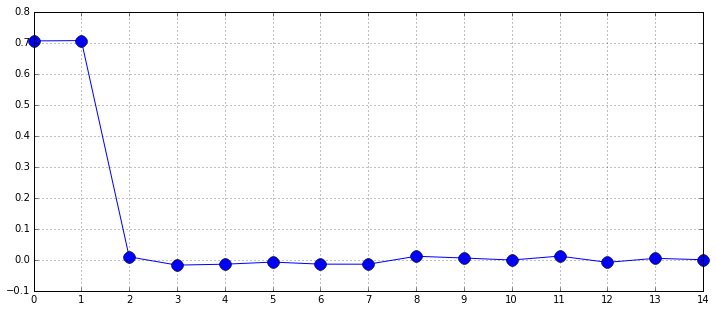

In [4]:
# number of dimensions (e.g. number of neuros)
D = 15
# number of samples (e.g. number of times)
N = 10 ** 4
# build independent samples
x = []
for i in range(D):
    x.append(numpy.random.normal(0.0, 1.0, size=N))
# artificially correlate dimensions 0 and 1
x[1] = x[0] + numpy.random.normal(0.0, 1.0, size=N) * 0.05
# compute averages and variances
av, var = [], []
for i in range(D):
    av.append(numpy.mean(x[i]))
    var.append(numpy.mean(x[i] ** 2) - av[i] ** 2)
# build correlation matrix c
c = numpy.zeros(shape=(D, D))
for i in xrange(D):
    for j in xrange(i + 1):
        c[i, j] = (numpy.mean(x[i] * x[j]) - av[i] * av[j]) / math.sqrt(var[j] * var[j])
        c[j ,i] = c[i, j]
# diagonalize c and find principal component (PC)
evals, evects = numpy.linalg.eig(c)
imax = numpy.argmax(evals)
PC = evects[imax]
# show principal component
plt.plot(PC, 'o-', ms=12, clip_on=False)
plt.grid()
plt.xticks(range(D))
plt.show()